In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt

In [39]:
# Load the dataset
data = pd.read_csv('/content/Student_Mental_Stress_and_Coping_Mechanisms.csv')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Student ID                            0
Age                                   0
Gender                                0
Academic Performance (GPA)            0
Study Hours Per Week                  0
Social Media Usage (Hours per day)    0
Sleep Duration (Hours per night)      0
Physical Exercise (Hours per week)    0
Family Support                        0
Financial Stress                      0
Peer Pressure                         0
Relationship Stress                   0
Mental Stress Level                   0
Counseling Attendance                 0
Diet Quality                          0
Stress Coping Mechanisms              0
Cognitive Distortions                 0
Family Mental Health History          0
Medical Condition                     0
Substance Use                         0
dtype: int64


In [40]:
# Fill missing values for categorical columns with their mode
data['Counseling Attendance'] = data['Counseling Attendance'].fillna(data['Counseling Attendance'].mode()[0])

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['Gender', 'Counseling Attendance', 'Family Mental Health History', 'Medical Condition'], drop_first=True)

In [41]:
data = data.drop(columns=['Stress Coping Mechanisms'])


In [42]:
# Identify numeric columns (excluding 'Student ID')
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Fill missing values for numeric columns with their mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


In [43]:
# Feature Scaling
scaler = StandardScaler()
numerical_features = ['Age', 'Academic Performance (GPA)', 'Study Hours Per Week', 'Social Media Usage (Hours per day)',
                      'Sleep Duration (Hours per night)', 'Physical Exercise (Hours per week)', 'Family Support',
                      'Financial Stress', 'Peer Pressure', 'Relationship Stress', 'Diet Quality',
                      'Cognitive Distortions', 'Substance Use']

In [44]:
# Ensure all features exist in the DataFrame before scaling
numerical_features = [feature for feature in numerical_features if feature in data.columns]

data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [45]:
# Extract features and target variable
X = data.drop(columns=['Student ID', 'Mental Stress Level'])
y = (data['Mental Stress Level'] > 5).astype(int)  # Binary classification: high stress (1) vs low stress (0)


In [46]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Train and evaluate Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [48]:
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))


Logistic Regression:
Accuracy: 0.46710526315789475
Precision: 0.42028985507246375
Recall: 0.4142857142857143
F1 Score: 0.4172661870503597


In [49]:
# Train and evaluate Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.5263157894736842
Precision: 0.48484848484848486
Recall: 0.45714285714285713
F1 Score: 0.47058823529411764


In [50]:
# Train and evaluate Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSupport Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))  # Corrected here
print("F1 Score:", f1_score(y_test, y_pred_svm))



Support Vector Machine:
Accuracy: 0.5197368421052632
Precision: 0.4727272727272727
Recall: 0.37142857142857144
F1 Score: 0.416


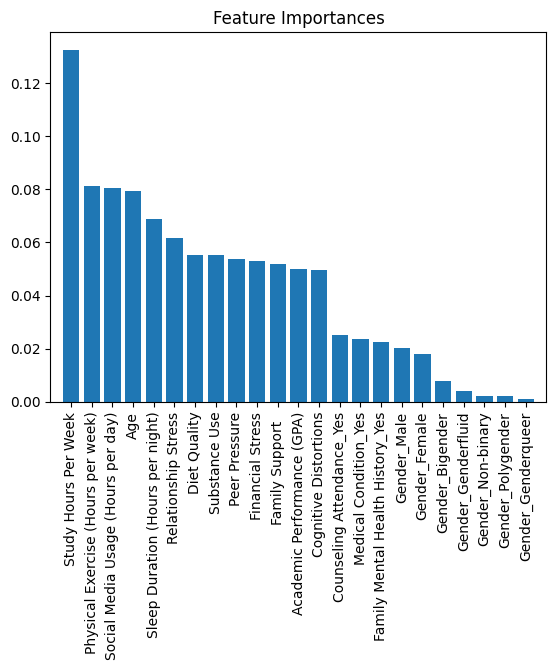

In [51]:
# Feature Importance from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

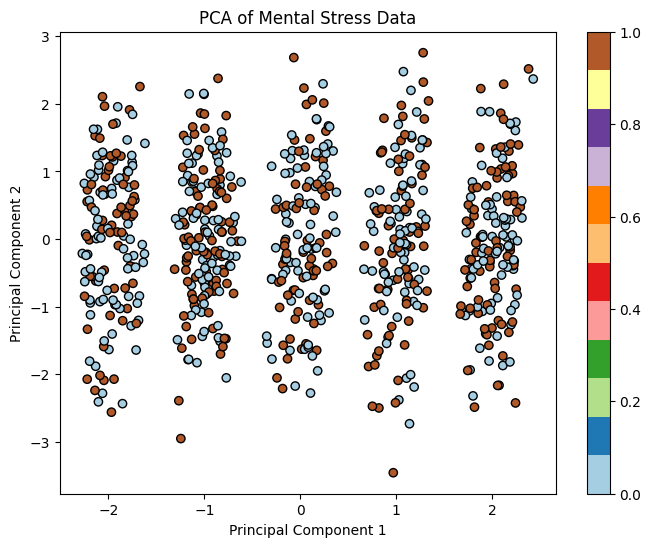

In [52]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title('PCA of Mental Stress Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [55]:
# Conduct a one-sample T-test with a hypothesized mean of 5
t_statistic, p_value = stats.ttest_1samp(data['Mental Stress Level'], 5)
print("\nOne-sample T-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: The mean Mental Stress Level is significantly different from 5.")
else:
    print("Fail to reject the null hypothesis: The mean Mental Stress Level is not significantly different from 5.")


One-sample T-test results:
T-statistic: 3.4488698737224532
P-value: 0.0005939960520346076
Reject the null hypothesis: The mean Mental Stress Level is significantly different from 5.


In [56]:
# Perform the Z-test
mean_stress = data['Mental Stress Level'].mean()
std_stress = data['Mental Stress Level'].std()
n = len(data['Mental Stress Level'])
z_statistic = (mean_stress - 5) / (std_stress / np.sqrt(n))
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print("\nZ-test results:")
print("Z-statistic:", z_statistic)
print("P-value:", p_value_z)

# Interpret the results
if p_value_z < 0.05:
    print("Reject the null hypothesis: The mean Mental Stress Level is significantly different from 5.")
else:
    print("Fail to reject the null hypothesis: The mean Mental Stress Level is not significantly different from 5.")


Z-test results:
Z-statistic: 3.448869873722444
P-value: 0.0005629379120024591
Reject the null hypothesis: The mean Mental Stress Level is significantly different from 5.
